# Histogram

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

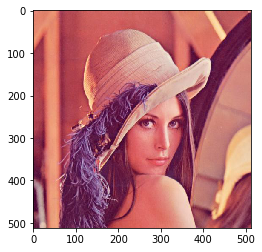

In [7]:
img = cv2.imread('datasets/hw3a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [8]:
print(img.shape)

(512, 512, 3)


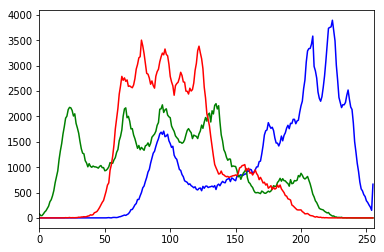

In [11]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()